#Framing An Analytics Problem: Analyse the dataset and list down the top 5 important variables, along with the business justifications.
A bank can generate revenue in a variety of ways, such as charging interest, transaction fees and financial advice. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation. The bank earns profits from the difference between the interest rates it pays on deposits and other sources of funds, and the interest rates it charges on the loans it gives out.

GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on the net banking, mobile banking, etc.

GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path=("/content/drive/MyDrive/godigt_cc_data.xlsx")
data=pd.read_excel(path)

In [ ]:
data.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [ ]:
data.tail()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000
8447,8448,4262 41XX XXXX XXXX,426241,Visa,rewards,2013-01-13,D,0,1,1,...,37,0,0,0,0,0,T,45244,Retired,130000


In [ ]:
data.shape

(8448, 28)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [ ]:
data.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [ ]:
data_num=data.select_dtypes(["float64","int64","datetime64[ns]"])
data_cat=data.select_dtypes(["object"])

#Missing Value treatment:
* There are some missing values in Transacot revolver variable which were imputed by using SimpleIputer using Most Frequent as
strategy

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imr=imputer.fit(data_cat)
data_cat=pd.DataFrame(imr.transform(data_cat),columns=data_cat.columns)

In [ ]:
data_new=pd.concat([data_num,data_cat],axis=1,join="inner")
data=data_new

In [ ]:
data.isnull().sum()

userid                     0
card_bin_no                0
card_source_date           0
active_30                  0
active_60                  0
active_90                  0
cc_active30                0
cc_active60                0
cc_active90                0
widget_products            0
engagement_products        0
annual_income_at_source    0
bank_vintage               0
T+1_month_activity         0
T+2_month_activity         0
T+3_month_activity         0
T+6_month_activity         0
T+12_month_activity        0
avg_spends_l3m             0
cc_limit                   0
card_no                    0
Issuer                     0
card_type                  0
high_networth              0
hotlist_flag               0
other_bank_cc_holding      0
Transactor_revolver        0
Occupation_at_source       0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
userid,8448.0,4.224500e+03,2.438872e+03,1.0,2112.75,4224.5,6336.25,8448.0
card_bin_no,8448.0,4.367470e+05,3.048975e+04,376916.0,426241.00,437551.0,438439.00,524178.0
active_30,8448.0,2.923769e-01,4.548815e-01,0.0,0.00,0.0,1.00,1.0
active_60,8448.0,4.947917e-01,5.000025e-01,0.0,0.00,0.0,1.00,1.0
active_90,8448.0,6.420455e-01,4.794271e-01,0.0,0.00,1.0,1.00,1.0
cc_active30,8448.0,2.840909e-01,4.510070e-01,0.0,0.00,0.0,1.00,1.0
cc_active60,8448.0,4.844934e-01,4.997891e-01,0.0,0.00,0.0,1.00,1.0
cc_active90,8448.0,6.323390e-01,4.821970e-01,0.0,0.00,1.0,1.00,1.0
widget_products,8448.0,3.614583e+00,2.273193e+00,0.0,2.00,4.0,6.00,7.0
engagement_products,8448.0,3.991122e+00,2.572135e+00,0.0,2.00,4.0,6.00,8.0


<Axes: >

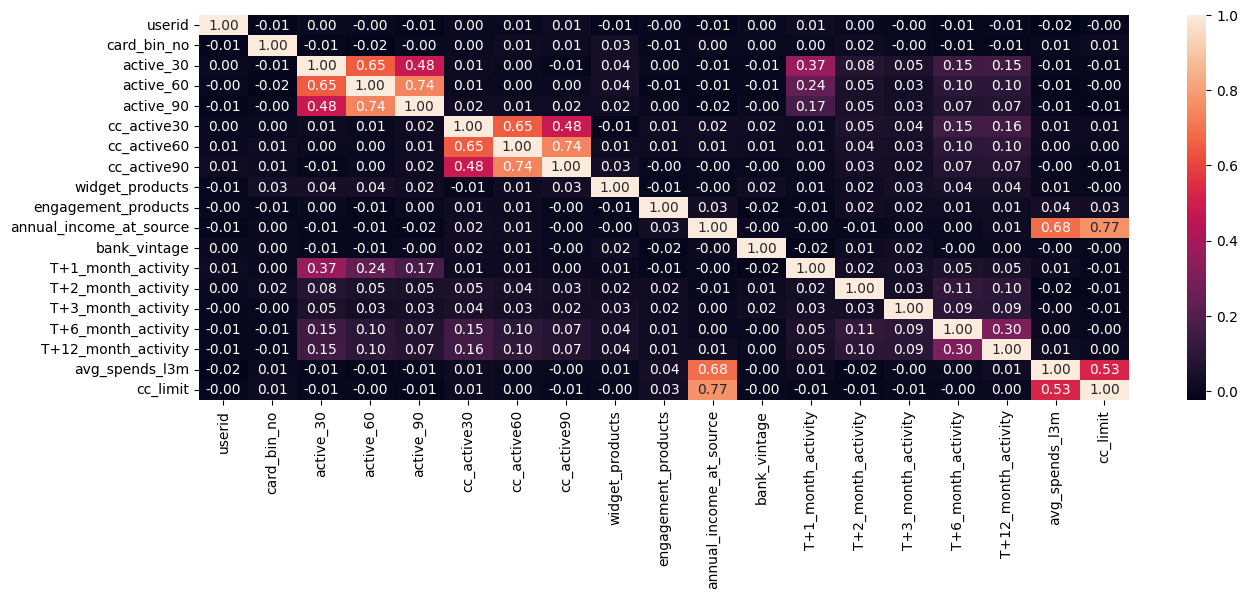

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True,fmt=".2f")

<Axes: xlabel='annual_income_at_source'>

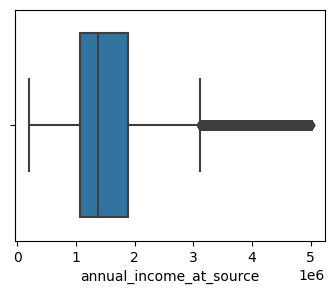

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=data,x="annual_income_at_source")

<Axes: xlabel='widget_products'>

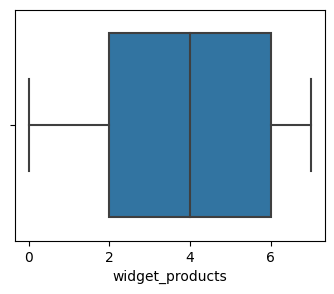

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=data,x="widget_products")

<Axes: xlabel='engagement_products'>

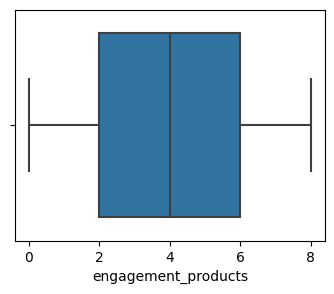

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=data,x="engagement_products")

<Axes: xlabel='bank_vintage'>

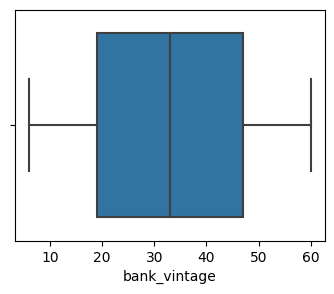

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=data,x="bank_vintage")

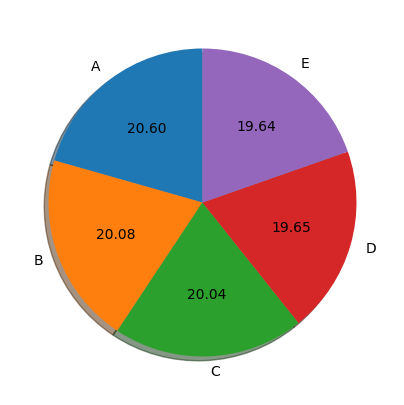

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(data["high_networth"].value_counts(),startangle=90,autopct="%.2f",labels=["A","B","C","D","E"],shadow=True);

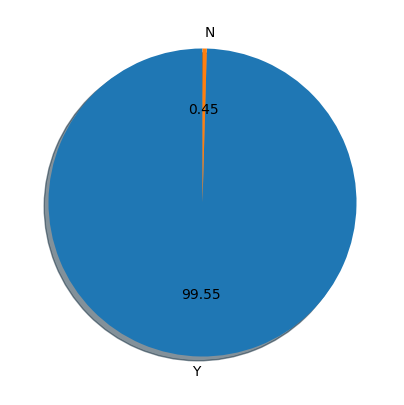

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(data["hotlist_flag"].value_counts(),startangle=90,autopct="%.2f",labels=["Y","N"],shadow=True);

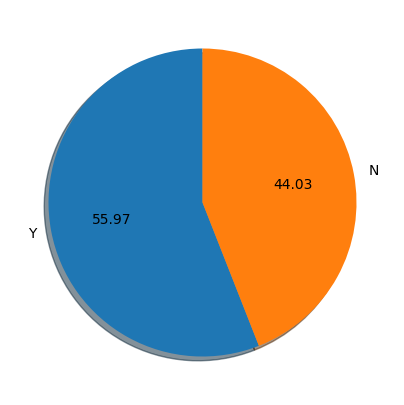

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(data["other_bank_cc_holding"].value_counts(),startangle=90,autopct="%.2f",labels=["Y","N"],shadow=True);

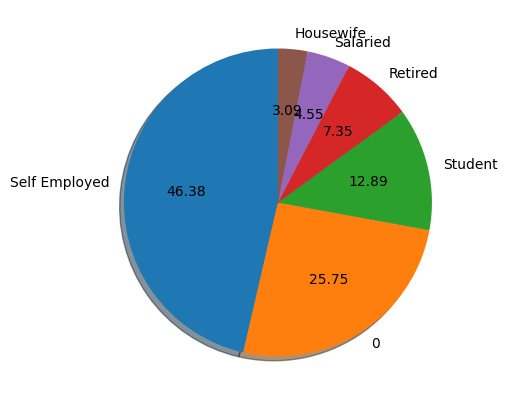

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(data["Occupation_at_source"].value_counts(),startangle=90,autopct="%.2f",labels=["Self Employed","0","Student","Retired","Salaried","Housewife"],shadow=True);

<Axes: xlabel='annual_income_at_source', ylabel='cc_limit'>

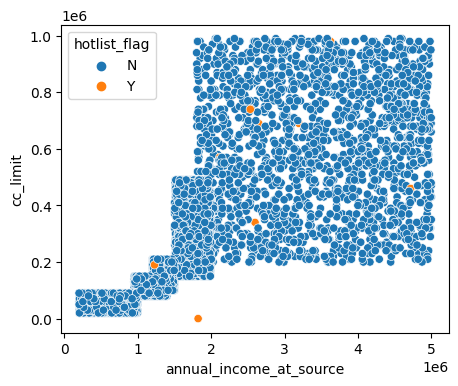

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data,x="annual_income_at_source",y="cc_limit",hue="hotlist_flag")

<Axes: xlabel='annual_income_at_source', ylabel='avg_spends_l3m'>

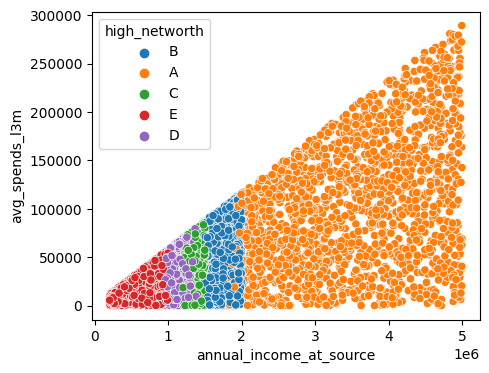

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data,x="annual_income_at_source",y="avg_spends_l3m",hue="high_networth")

<Axes: xlabel='annual_income_at_source', ylabel='avg_spends_l3m'>

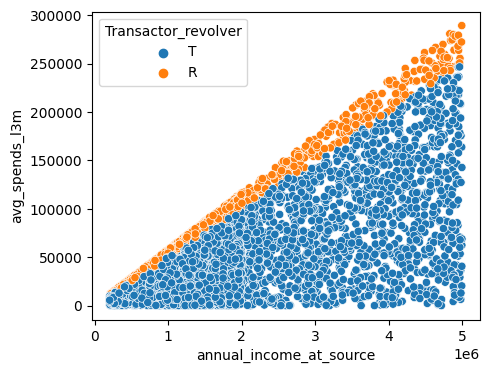

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data,x="annual_income_at_source",y="avg_spends_l3m",hue="Transactor_revolver")

<Axes: xlabel='cc_limit', ylabel='avg_spends_l3m'>

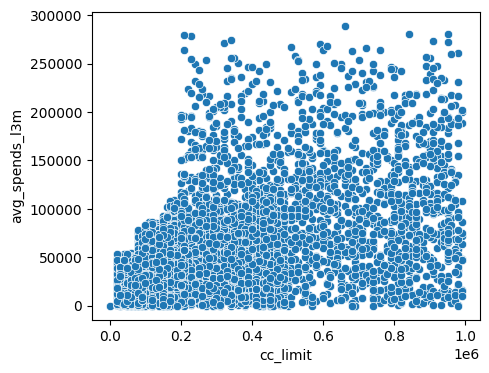

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data,x="cc_limit",y="avg_spends_l3m")

<Axes: xlabel='bank_vintage', ylabel='T+1_month_activity'>

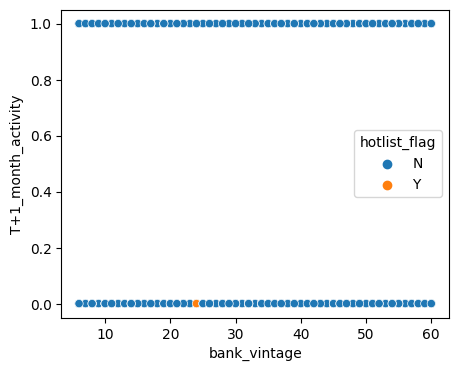

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data,x="bank_vintage",y="T+1_month_activity",hue="hotlist_flag")

In [ ]:
pd.crosstab(data["Transactor_revolver"],data["Occupation_at_source"])

Occupation_at_source,0,Housewife,Retired,Salaried,Self Employed,Student
Transactor_revolver,,,,,,
R,47,47,161,609,337,94
T,214,337,928,3309,1838,527


In [ ]:
pd.crosstab([data["high_networth"],data["other_bank_cc_holding"]],[data["hotlist_flag"],data["Transactor_revolver"]])

hotlist_flag                           N       Y
Transactor_revolver                    R    T  T
high_networth other_bank_cc_holding             
A             N                      126  666  5
              Y                      156  780  7
B             N                      105  625  1
              Y                      134  791  4
C             N                       96  635  1
              Y                      156  765  6
D             N                      126  631  2
              Y                      151  781  5
E             N                      111  586  4
              Y                      134  855  3

<Axes: xlabel='cc_active30', ylabel='annual_income_at_source'>

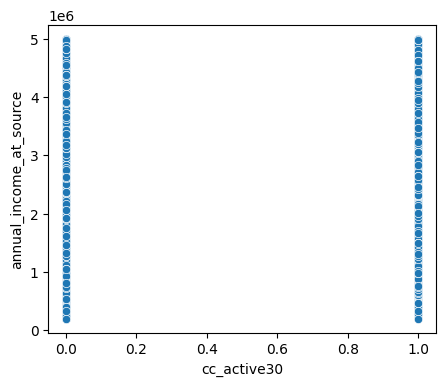

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data,x="cc_active30",y="annual_income_at_source")

<Axes: xlabel='avg_spends_l3m', ylabel='engagement_products'>

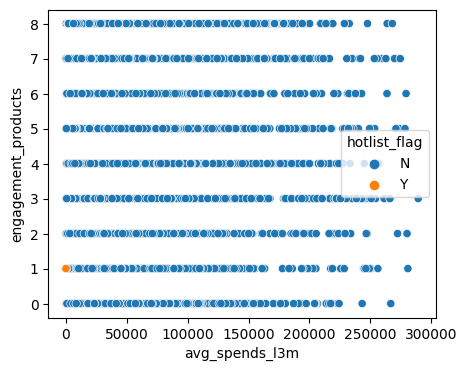

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data,x="avg_spends_l3m",y="engagement_products",hue="hotlist_flag")

<Axes: xlabel='annual_income_at_source', ylabel='engagement_products'>

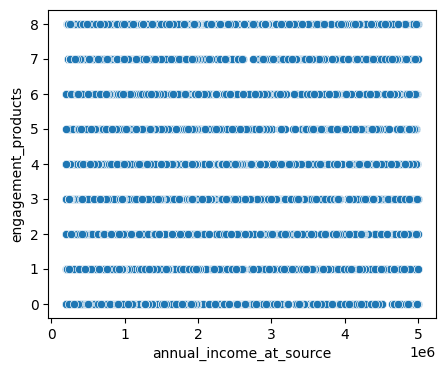

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data,x="annual_income_at_source",y="engagement_products")

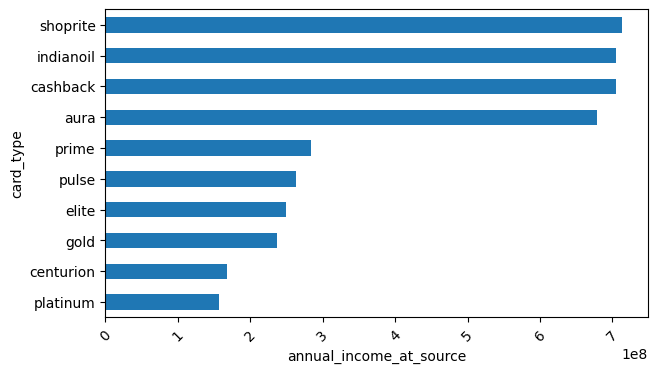

In [ ]:
plt.figure(figsize=[7,4])
data.groupby("card_type")['annual_income_at_source'].sum().sort_values().head(10).plot.barh();
plt.ylabel("card_type",fontsize = 10)
plt.xlabel("annual_income_at_source",fontsize = 10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

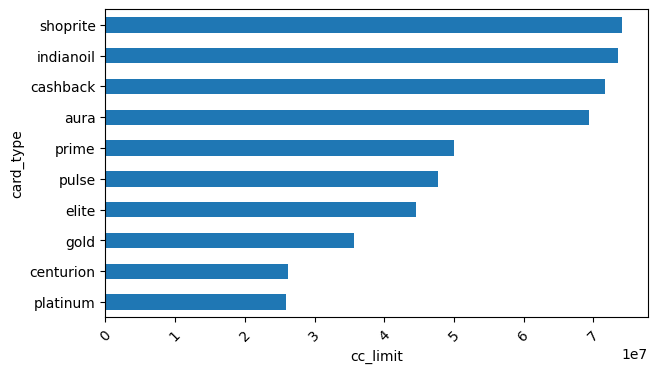

In [ ]:
plt.figure(figsize=[7,4])
data.groupby("card_type")['cc_limit'].sum().sort_values().head(10).plot.barh();
plt.ylabel("card_type",fontsize = 10)
plt.xlabel("cc_limit",fontsize = 10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

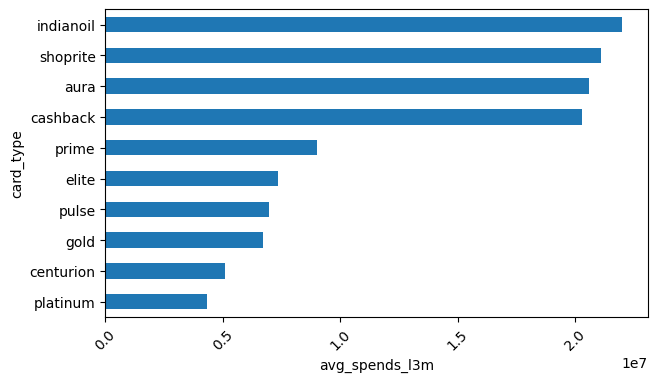

In [ ]:
plt.figure(figsize=[7,4])
data.groupby("card_type")['avg_spends_l3m'].sum().sort_values().head(10).plot.barh();
plt.ylabel("card_type",fontsize=10)
plt.xlabel("avg_spends_l3m",fontsize = 10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
data.groupby("card_type")["engagement_products"].sum().sort_values(ascending = False).reset_index().head(10)

,card_type,engagement_products
0,rewards,6063
1,prosperity,4139
2,edge,3990
3,chartered,3677
4,smartearn,2931
5,shoprite,2799
6,indianoil,2709
7,cashback,2599
8,aura,2561
9,gold,553


In [ ]:
data.groupby("card_type")["cc_active30"].sum().sort_values(ascending = False).reset_index().head(10)

,card_type,cc_active30
0,rewards,417
1,edge,301
2,chartered,276
3,prosperity,275
4,smartearn,217
5,indianoil,207
6,cashback,186
7,aura,183
8,shoprite,178
9,prime,36


In [ ]:
data.groupby("card_type")["cc_active60"].sum().sort_values(ascending = False).reset_index().head(10)

,card_type,cc_active60
0,rewards,720
1,prosperity,496
2,edge,483
3,chartered,447
4,smartearn,357
5,cashback,343
6,indianoil,340
7,shoprite,319
8,aura,314
9,gold,64


In [ ]:
data.groupby("card_type")["T+1_month_activity"].sum().sort_values(ascending = False).reset_index().head(10)

,card_type,T+1_month_activity
0,rewards,176
1,prosperity,117
2,edge,103
3,chartered,100
4,smartearn,92
5,aura,75
6,cashback,73
7,shoprite,73
8,indianoil,72
9,pulse,15


In [ ]:
data.groupby("card_type")["T+6_month_activity"].sum().sort_values(ascending = False).reset_index().head(10)

,card_type,T+6_month_activity
0,rewards,14
1,prosperity,12
2,edge,10
3,cashback,8
4,indianoil,7
5,chartered,6
6,aura,5
7,shoprite,5
8,smartearn,3
9,platinum,2


In [ ]:
data.groupby("card_type")["avg_spends_l3m"].sum().sort_values(ascending = False).reset_index().head(10)

,card_type,avg_spends_l3m
0,edge,77402236
1,prosperity,76319954
2,chartered,71376442
3,rewards,47338426
4,smartearn,22479443
5,indianoil,22002299
6,shoprite,21099458
7,aura,20590288
8,cashback,20313591
9,prime,9005176


In [ ]:
data.groupby("card_type")["cc_active90"].sum().sort_values(ascending = False).reset_index().head(10)

,card_type,cc_active90
0,rewards,947
1,prosperity,634
2,edge,617
3,chartered,579
4,smartearn,488
5,indianoil,452
6,cashback,450
7,shoprite,419
8,aura,400
9,gold,88


<Axes: xlabel='avg_spends_l3m', ylabel='bank_vintage'>

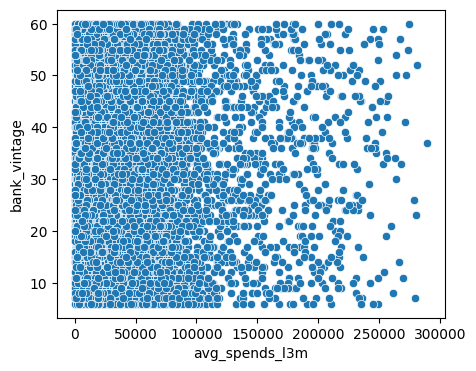

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=data,x="avg_spends_l3m",y="bank_vintage")

#Insighst from the business problem:
* Top 5 important variables:
1. Annual income at source
* With the increase in the annual_income_at_source, there is an increase in the average amount spent in the last 3 months which is also increase in the
usage of credit card.
2. cc_limit
* There is a positive correlation between cc_limit and avg_spends_l3m. With the increase in the limit of credit card there is an increase in the average amount spent in the last 3 months, which in results increase in the usage of
credit card
3. avg_spends_l3m
* The average spends in the last 3 months variable can give important insights on customer spending behaviour.If there are more spends means they are using credit card more.
4. cc_active30
Active 30 variable can be used to understand the frequency of card usage by the customer. We can also see if the customer is facing if he is facing any issues leading to less usage of the card and we can solve the issues.
5. T+1 month activity
* If we know how customer uses credit card, we can make some promotion offers to increase the activity in the card.
